## Import libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import zipfile


### Download the results file from the TSE Dados Abertos

Uncomment when running the code for the first time, then you can comment again

In [3]:
# url_download = 'https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_secao/votacao_secao_2022_BR.zip'
# opener = urllib.request.build_opener()
# opener.addheaders = [('User-agent', 'Mozilla/5.0')]
# urllib.request.install_opener(opener)
# urllib.request.urlretrieve(url_download, f"CSV/votacao_secao_2022_BR.zip")

('CSV/votacao_secao_2022_BR.zip', <http.client.HTTPMessage at 0x7ff60a2c9220>)

If you prefer you can download the files manually: The full list of files can be found [here](https://dadosabertos.tse.jus.br/dataset/resultados-2022)!

### Unzip the downloaded file


Uncomment when running the code for the first time, then you can comment again

In [4]:
# with zipfile.ZipFile(f"CSV/votacao_secao_2022_BR.zip", 'r') as zip_ref:
#     zip_ref.extractall("CSV/")

### Read the extracted CSV

In [5]:
df = pd.read_csv("CSV/votacao_secao_2022_BR.csv", encoding="Latin 1", sep=";", usecols=['NR_TURNO','SG_UF','NM_MUNICIPIO','NR_ZONA','NR_SECAO','DS_CARGO','NM_VOTAVEL','QT_VOTOS'])

In [8]:
# Quality check, total votes for Lula in MT
df[(df['SG_UF']=='MT')&(df['NM_VOTAVEL']=='LUIZ INÁCIO LULA DA SILVA')&(df['DS_CARGO']=='PRESIDENTE')&(df['NR_TURNO']==2)]['QT_VOTOS'].sum()

652786

In [9]:
df.columns

Index(['NR_TURNO', 'SG_UF', 'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'DS_CARGO',
       'NM_VOTAVEL', 'QT_VOTOS'],
      dtype='object')

### Run pivot tables per region

In [ ]:
list_states_co = ['GO','MT','MS','DF']
list_states_su = ['RS','SC','PR']
list_states_sd = ['SP','MG','RJ','ES']
list_states_ne = ['BA','MA','PI','RN','PB','SE','CE','PE','AL']
list_states_no = ['AC','AP','RR','RO','AM','TO','PA']

In [23]:
df_sub = df[(df['SG_UF'].isin(list_states_co))&(df['NR_TURNO']==2)]

results = df_sub[['SG_UF','NM_MUNICIPIO','NM_VOTAVEL','QT_VOTOS']].groupby(by=['SG_UF','NM_MUNICIPIO','NM_VOTAVEL']).sum("QT_VOTOS")
pivot = results.unstack(level='NM_VOTAVEL')
results_sessao = df_sub[['SG_UF','NM_MUNICIPIO','NR_ZONA','NR_SECAO','NM_VOTAVEL','QT_VOTOS']].groupby(by=['SG_UF','NM_MUNICIPIO','NR_ZONA','NR_SECAO','NM_VOTAVEL']).sum("QT_VOTOS")
pivot_sessao_co = results_sessao.unstack(level='NM_VOTAVEL')

In [24]:
df_sub = df[(df['SG_UF'].isin(list_states_ne))&(df['NR_TURNO']==2)]

results = df_sub[['SG_UF','NM_MUNICIPIO','NM_VOTAVEL','QT_VOTOS']].groupby(by=['SG_UF','NM_MUNICIPIO','NM_VOTAVEL']).sum("QT_VOTOS")
pivot = results.unstack(level='NM_VOTAVEL')
results_sessao = df_sub[['SG_UF','NM_MUNICIPIO','NR_ZONA','NR_SECAO','NM_VOTAVEL','QT_VOTOS']].groupby(by=['SG_UF','NM_MUNICIPIO','NR_ZONA','NR_SECAO','NM_VOTAVEL']).sum("QT_VOTOS")
pivot_sessao_ne = results_sessao.unstack(level='NM_VOTAVEL')

In [26]:
df_sub = df[(df['SG_UF'].isin(list_states_su))&(df['NR_TURNO']==2)]

results = df_sub[['SG_UF','NM_MUNICIPIO','NM_VOTAVEL','QT_VOTOS']].groupby(by=['SG_UF','NM_MUNICIPIO','NM_VOTAVEL']).sum("QT_VOTOS")
pivot = results.unstack(level='NM_VOTAVEL')
results_sessao = df_sub[['SG_UF','NM_MUNICIPIO','NR_ZONA','NR_SECAO','NM_VOTAVEL','QT_VOTOS']].groupby(by=['SG_UF','NM_MUNICIPIO','NR_ZONA','NR_SECAO','NM_VOTAVEL']).sum("QT_VOTOS")
pivot_sessao_su = results_sessao.unstack(level='NM_VOTAVEL')

In [27]:
df_sub = df[(df['SG_UF'].isin(list_states_sd))&(df['NR_TURNO']==2)]

results = df_sub[['SG_UF','NM_MUNICIPIO','NM_VOTAVEL','QT_VOTOS']].groupby(by=['SG_UF','NM_MUNICIPIO','NM_VOTAVEL']).sum("QT_VOTOS")
pivot = results.unstack(level='NM_VOTAVEL')
results_sessao = df_sub[['SG_UF','NM_MUNICIPIO','NR_ZONA','NR_SECAO','NM_VOTAVEL','QT_VOTOS']].groupby(by=['SG_UF','NM_MUNICIPIO','NR_ZONA','NR_SECAO','NM_VOTAVEL']).sum("QT_VOTOS")
pivot_sessao_sd = results_sessao.unstack(level='NM_VOTAVEL')

### Define X and Y for both candidates

In [28]:
x_co = pivot_sessao_co['QT_VOTOS', 'LUIZ INÁCIO LULA DA SILVA']
y_co = pivot_sessao_co['QT_VOTOS', 'JAIR MESSIAS BOLSONARO']

x_ne = pivot_sessao_ne['QT_VOTOS', 'LUIZ INÁCIO LULA DA SILVA']
y_ne = pivot_sessao_ne['QT_VOTOS', 'JAIR MESSIAS BOLSONARO']

x_su = pivot_sessao_su['QT_VOTOS', 'LUIZ INÁCIO LULA DA SILVA']
y_su = pivot_sessao_su['QT_VOTOS', 'JAIR MESSIAS BOLSONARO']

x_sd = pivot_sessao_sd['QT_VOTOS', 'LUIZ INÁCIO LULA DA SILVA']
y_sd = pivot_sessao_sd['QT_VOTOS', 'JAIR MESSIAS BOLSONARO']



### Draw scatterplot

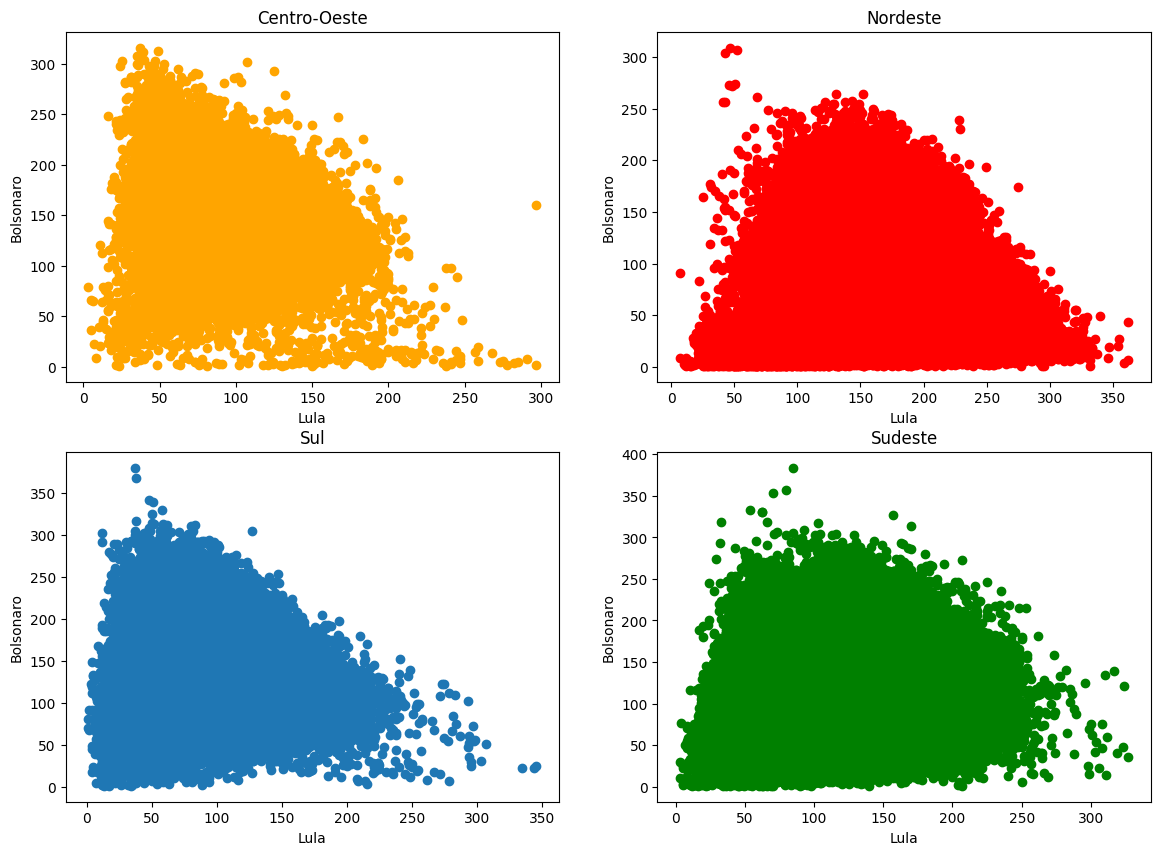

In [40]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(14, 10)
axs[0, 0].scatter(x_co, y_co, color='orange')
axs[0, 0].set_title('Centro-Oeste')
axs[0, 1].scatter(x_ne, y_ne, color='red')
axs[0, 1].set_title('Nordeste')
axs[1, 0].scatter(x_su, y_su)
axs[1, 0].set_title('Sul')
axs[1, 1].scatter(x_sd, y_sd, color='green')
axs[1, 1].set_title('Sudeste')

for ax in axs.flat:
    ax.set(xlabel='Lula', ylabel='Bolsonaro')